In [6]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [7]:
# !unzip /content/drive/MyDrive/Dataset.zip

In [8]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [9]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)

In [10]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [11]:
# distribution of classes in the dataset
data['emergency_or_not'].value_counts()

,count
emergency_or_not,
0,1361
1,991


In [35]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

In [13]:
# shape of the image
X.shape

(2352, 224, 224, 3)

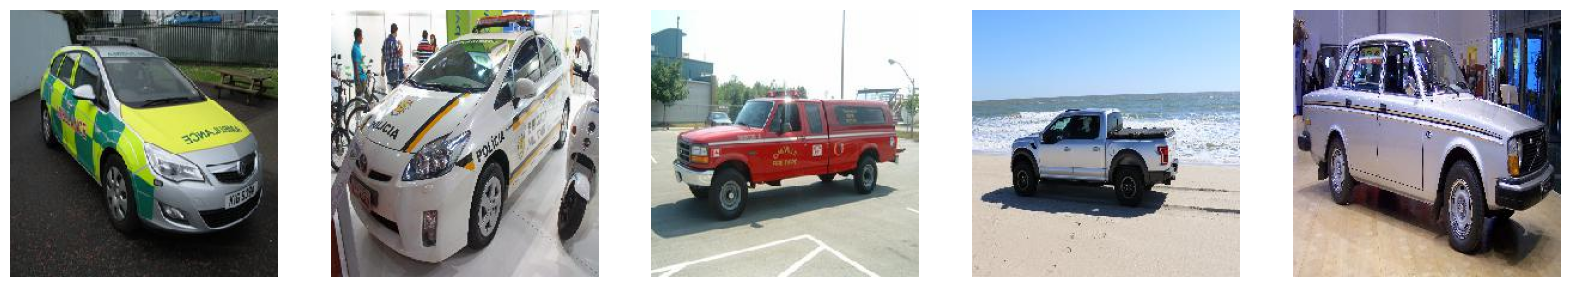

In [14]:
# visualizing images
fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in range(5):
    ax[i].imshow(X[i*400])
    ax[i].axis('off')

In [34]:
# minimum and maximum pixel values of images
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

In [36]:
# normalizing the pixel values
X = X / X.max()

In [37]:
# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(np.float64(0.0), np.float64(1.0))

In [38]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [39]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 224, 224, 3), (1646,)), ((706, 224, 224, 3), (706,)))

In [46]:
from keras.layers import Dense, InputLayer, Flatten, Dropout, BatchNormalization
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

In [43]:
image_augmentation = ImageDataGenerator(rotation_range=30, width_shift_range=40, height_shift_range=40, horizontal_flip=True, vertical_flip=True, fill_mode='nearest')
image_augmentation.fit(X_train)

In [44]:
# defining the architecture of the model
model=Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))
model.add(Flatten())
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [45]:
# summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,063,901 (57.46 MB)

 Trainable params: 15,063,501 (57.46 MB)

 Non-trainable params: 400 (1.56 KB)

In [47]:
adam = Adam(learning_rate=1e-5)

In [48]:
# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [56]:
from keras.callbacks import ModelCheckpoint

filepath = 'best_weights.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [50]:
# training the model
model_history = model.fit(image_augmentation.flow(X_train, y_train, batch_size=128), validation_data=(X_valid, y_valid), epochs=50)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 30s 2s/step - accuracy: 0.5165 - loss: 0.9844 - val_accuracy: 0.5609 - val_loss: 0.7562
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5615 - loss: 0.9065 - val_accuracy: 0.5609 - val_loss: 0.7447
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5495 - loss: 0.9706 - val_accuracy: 0.5609 - val_loss: 0.7249
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5623 - loss: 0.9089 - val_accuracy: 0.5609 - val_loss: 0.7250
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5695 - loss: 0.8587 - val_accuracy: 0.5609 - val_loss: 0.7132
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5510 - loss: 0.9007 - val_accuracy: 0.5609 - val_loss: 0.7084
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5604 - loss: 0.9050 - val_accuracy: 0.5609 - val_loss: 0.7071
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.5688 - loss: 0.8511 - val_accuracy: 0.5609 - val_loss:

In [51]:
# getting predictions in the form of class as well as probabilities
prediction = model.predict(X_valid)[:,0]
predictions = np.where(prediction < 0.5, 0, 1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step


In [52]:
# accuracy on validation set
from sklearn.metrics import accuracy_score
print('Accuracy on validation set:', accuracy_score(y_valid, predictions), '%')

Accuracy on validation set: 0.6529745042492918 %


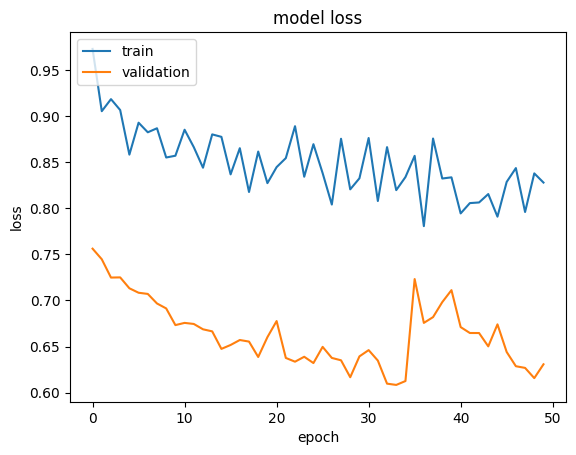

In [53]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

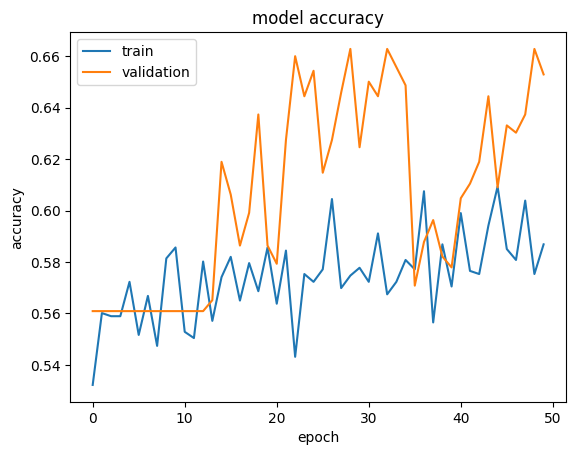

In [54]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()